This dataset describes the salaries of different data science fields in DS domain.

The goal of this analysis is to provide insights into the current salary trajectories in the realm of data science field that is advancing quickly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# from wordcloud import WordCloud

# Converting residential codes to ISO3
import country_converter as cc

In [2]:
#### Loading the dataset

df_ds = pd.read_csv('ds_salaries.csv')

df_ds.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
print(df_ds.shape)

print()

df_ds.info()

(3755, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
#### Examining for null/missing values:

df_ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


This dataset contains no missing/null values, and contains 11 columns and 3755 rows:

1. `work_year` [categorical]: The year the salary was paid.

2. `experience_level` [categorical]: The experience level in the job during the year.

3. `employment_type` [categorical]: The type of employment for the role.

4. `job_title` [categorical]: The role worked in during the year.

5. `salary` [numerical]: The total gross salary amount paid.

6. `salary_currency` [categorical]: The currency of the salary paid as an ISO 4217 currency code.

7. `salary_in_usd` [numerical]: The salary in USD.

8. `employee_residence` [categorical]: Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. `remote_ratio` [numerical]: The overall amount of work done remotely.

10. `company_location` [categorical]: The country of the employer's main office or contracting branch.

11. `company_size` [categorical]: The median number of people that worked for the company during the year.



## Univariate Analysis

#### Experience Levels of Data Science jobs

In [5]:
df_ds['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [6]:
df_ds['experience_level'] = df_ds['experience_level'].replace('EN', 'Entry-level (Junior)')
df_ds['experience_level'] = df_ds['experience_level'].replace('MI', 'Mid-level (Intermediate)')
df_ds['experience_level'] = df_ds['experience_level'].replace('SE', 'Senior-level (Senior)')
df_ds['experience_level'] = df_ds['experience_level'].replace('EX', 'Executive-level (Director)')

experience = df_ds['experience_level'].value_counts()

In [7]:
fig = px.treemap(experience, path = [experience.index], values = experience.values,
                 title = 'Experience Level of Employees')
fig.show()

WHAT WE KNOW:
- Most of the employees are at "Senior-Level", followed by "Mid-Level". 

#### Most Famous/Top 10 data science jobs

In [8]:
best_ds_jobs = df_ds['job_title'].value_counts()[:10]

In [9]:
fig = px.bar(x = best_ds_jobs.index, y = best_ds_jobs.values, text = best_ds_jobs.values,
             title = 'Best Data Science jobs')
fig.update_layout(xaxis_title = 'Job titles', yaxis_title = 'Count')

fig.show()

WHAT WE KNOW:
- The top three DS jobs are: Data Engineer > Data Scientist > Data Analyst.

#### Types of Employment

What we have in employment_type:

- FT = Full-Time
- PT = Part-Time
- CT = Contract
- FL = Freelance

Renaming the acronyms to full:

In [10]:
df_ds['employment_type'] = df_ds['employment_type'].replace('FT', 'Full-Time')
df_ds['employment_type'] = df_ds['employment_type'].replace('PT', 'Part-Time')
df_ds['employment_type'] = df_ds['employment_type'].replace('CT', 'Contract')
df_ds['employment_type'] = df_ds['employment_type'].replace('FL', 'Freelance')

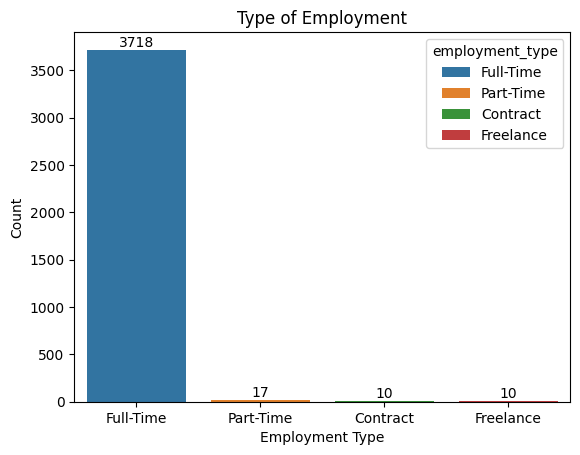

In [11]:
#### Using Seaborn to create a bar chart showing the employment type distributions

employment = df_ds['employment_type'].value_counts()

g = sns.barplot(x = employment.index, y = employment.values, hue = employment.index, legend = True)

g.set_title('Type of Employment')
g.set_xlabel('Employment Type')
g.set_ylabel('Count')

# Showing Bar graph values:
for i in g.containers:
    g.bar_label(i,)


WHAT WE KNOW:
- The above bar chart tells us that majority of employees are working **Full-time**.


#### Company Sizes:

In company_sizes, there are:

- Small = S
- Medium = M
- Large = L

In [12]:
comp_size = df_ds['company_size'].value_counts()

fig = px.bar(x = comp_size.index, y = comp_size.values, text = comp_size.values, color = comp_size.index,
             title = 'Distribution of Company Sizes')

fig.update_layout(xaxis_title = 'Company Size', yaxis_title = 'Count')

## Arranging the order of `company_size` in normal order
fig.update_xaxes(categoryorder='array', categoryarray= ['S', 'M', 'L'])
fig.show()

WHAT WE KNOW:
- There are many Medium sized companies with DS jobs. Only small proportion of Large and Small companies have/offer DS jobs.

#### Company Location && Employee Locations

The column `employee_residence` contains employee's country of residence as an ISO 3166 country code. Therefore, we convert this using country_converter library and visualize them on a map:

In [13]:
#### Converting the employee residence:

df_ds['employee_residence'] = cc.convert(names = df_ds['employee_residence'], to = 'ISO3')


In [14]:
employ_res = df_ds['employee_residence'].value_counts()

fig = px.choropleth(locations = employ_res.index, color = employ_res.values, 
                    color_continuous_scale = px.colors.sequential.Greens,
                    title = 'Locations of Employees')

fig.show()

In [15]:
employ_res = employ_res[:10]

fig = px.bar(x = employ_res.index, y = employ_res.values, text = employ_res.values, color = employ_res.index,
             title = 'Distribution of Employee Locations')
fig.show()

WHAT WE KNOW:
- Above diagram shows that most of the employees are located in USA (Darker color in the USA on the map), followed by tiny portion of Great Britain.

#### Employee Residence vs Company Location (Bivariate Analysis)

In [16]:
plt.figure(figsize = (10, 8))


df_ds['company_location'] = cc.convert(names = df_ds['company_location'], to = 'ISO3')
company_res = df_ds['company_location'].value_counts()[:10]
# df_employee_loc = cc.convert(names = df_ds['employee_residence'], to = 'ISO3')

fig = go.Figure(data = [
    go.Bar(name = 'Location of Employee', x = employ_res.index, y = employ_res.values, text = employ_res.values),
    go.Bar(name = 'Location of Company', x = company_res.index, y = company_res.values, text = company_res.values)
])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Employee Residence vs Company Location')

fig.show()

<Figure size 1000x800 with 0 Axes>

WHAT WE KNOW:
- A high `employee_residence` trend is also followed by the `company_location`. 

## Numerical Data Examination

#### Distribution of Job Work Years

In [17]:
work_year = df_ds['work_year'].value_counts()

fig = px.pie(values = work_year.values, names = work_year.index, title = 'Distribution of Work Years')

fig.show()

Why are we doing this analysis in the first place? 
- According to the pie chart above, it is important to note that since 2020, there has been a huge growth/demand in the Data Science jobs!

#### Distribution of Salary + Salary in USD

In [18]:
plt.figure(figsize=(12, 8))

salary = df_ds['salary_in_usd'].value_counts()

fig = px.box(y = salary.index, title = 'Distribution of Salary')

fig.update_layout(yaxis_title = 'Salary')
fig.show()

#### *Potential Outliers in the dataset?*

<Figure size 1200x800 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 8))

salary = df_ds['salary_in_usd'].value_counts()

fig = px.histogram(x = salary.index, y = salary.values, 
                   title = 'Distribution of Salary in USD')
fig.update_layout(xaxis_title = 'Salary', yaxis_title = 'Count')
fig.show()

<Figure size 1200x800 with 0 Axes>

WHAT WE KNOW:
- The box plot and the histogram tells us that most of the salary lie between $120k - $150k. 

#### Remote Ratio of Employees

- 100 = On-site
- 50 = Hybrid
- 0 = Fully-Remote

We convert these ratios to corresponding meanings: 

In [20]:
df_ds['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [21]:
df_ds['remote_ratio'] = df_ds['remote_ratio'].replace(100, 'Fully Remote')
df_ds['remote_ratio'] = df_ds['remote_ratio'].replace(50, 'Hybrid')
df_ds['remote_ratio'] = df_ds['remote_ratio'].replace(0, 'No Remote')

In [22]:
employee_remote = df_ds['remote_ratio'].value_counts()
# remote_type = ['Fully Remote', 'On-Site', 'Hybrid']


fig = px.bar(x = employee_remote.index, y = employee_remote.values, text = employee_remote.values, color = employee_remote.index,
              title = 'Distribution of Remote Employees')

fig.update_layout(xaxis_title = 'Remote Type', yaxis_title = 'Count')
fig.show()

WHAT WE KNOW:
- From this we know that most employees are working On-Site, while some numbers of employees work remotely. Only marginal portion of employees work hybrid.

## Bivariate Analysis

#### Looking at the Salary:

#### 1. What is the top 15 highest paying jobs in data science job fields?

In [23]:
highest_payment = df_ds.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)[:15]

fig = px.bar(x = highest_payment.index, y = highest_payment.values, text = highest_payment.values, color = highest_payment, 
             title = 'Highest Paying Job in DS Field')
fig.update_layout(xaxis_title = 'Job titles', yaxis_title = 'Salary in USD')


WHAT WE KNOW:
- The highest paying data science job is: Research Scientist > Data Analyst > AI Scientist

#### 2. Salary based on the work year? (Progressive chart?)

In [24]:
df_ds_2023 = df_ds[df_ds['work_year'] == 2023]
df_ds_2022 = df_ds[df_ds['work_year'] == 2022]
df_ds_2021 = df_ds[df_ds['work_year'] == 2021]
df_ds_2020 = df_ds[df_ds['work_year'] == 2020]

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])

In [25]:
year_salary['2020'] = df_ds_2020['salary_in_usd'].mean()
year_salary['2021'] = df_ds_2021['salary_in_usd'].mean()
year_salary['2022'] = df_ds_2022['salary_in_usd'].mean()
year_salary['2023'] = df_ds_2023['salary_in_usd'].mean()


hist_data = [df_ds_2020['salary_in_usd'], df_ds_2021['salary_in_usd'], 
            df_ds_2022['salary_in_usd'], df_ds_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']


In [26]:
# fig1 = px.bar(x = year_salary.columns, y = year_salary.values.tolist()[0], color = year_salary.columns, 
#               title = 'Average Salary based on Work Year')

# fig2 = go.Figure(data = ff.create_distplot(hist_data, group_labels, show_hist = False))

# fig1.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
# fig2.update_layout(title = 'Salary Distribution based on Work Year')
# fig1.show()
# fig2.show()

#### 3. Salary based on the Experience Level

In [27]:
experience_salary = round(df_ds.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True))

In [28]:
## OR

# experience_salary = df_ds[['experience_level','salary_in_usd']]

# en_salary = df_ds[df_ds['experience_level'] == 'EN']
# mi_salary = df_ds[df_ds['experience_level'] == 'MI']
# se_salary = df_ds[df_ds['experience_level'] == 'SE']
# ex_salary = df_ds[df_ds['experience_level'] == 'EX']

# hist_data = [en_salary['salary_in_usd'], mi_salary['salary_in_usd'], se_salary['salary_in_usd'], ex_salary['salary_in_usd']]
# group_labels = ['EN', 'MI', 'SE', 'EX']

# means = [en_salary['salary_in_usd'].mean(), mi_salary['salary_in_usd'].mean(), se_salary['salary_in_usd'].mean(), 
#          ex_salary['salary_in_usd'].mean()]

# fig = px.bar(x = group_labels, y = experience_salary.values, color = group_labels, text = experience_salary.values,
#              title = 'Average Salary based on the Employee Experience Levels')

In [29]:
fig = px.bar(x = experience_salary.index, y = experience_salary.values, color = experience_salary.index, text = experience_salary.values,
             title = 'Average Salary based on the Employee Experience Levels')

fig.update_layout(xaxis_title = 'Experience Levels', yaxis_title = 'Salary in USD')

fig.show()

WHAT WE KNOW:
- The above graph shows that as the employee's experience levels increase, the higher the average salary. 

#### 4. Salary based on the Company Size

In [30]:
size_salary = round(df_ds.groupby('company_size')['salary_in_usd'].mean())

# order = ['S', 'M', 'L']
# mapping = {size: i for i, size in enumerate(order)}
# key = size_salary.map(mapping)

In [31]:
fig = px.bar(x = size_salary.index, y = size_salary.values, color = size_salary.index, text = size_salary.values,
             title = 'Average Salary based on the Company Size')

fig.update_layout(xaxis_title = 'Company Size', yaxis_title = 'Salary in USD')

## using `categoryorder` to set the list of order that you want to use for the axis!
fig.update_xaxes(categoryorder='array', categoryarray= ['S', 'M', 'L'])
fig.show()

WHAT WE KNOW:
- Medium-sized company pays higher average salary then Small and Large companies.

#### 5. Salary based on the company location?

In [32]:
location_mean = round(df_ds.groupby('company_location')['salary_in_usd'].mean())

fig = px.choropleth(locations = location_mean.index, color = location_mean.values, 
                    color_continuous_scale = px.colors.sequential.Greens,
                    title = 'Locations of Employees')
fig.show()

WHAT WE KNOW:
- Above map diagram shows us that USA, and RUS pays the highest salary based on the location of the company location.

#### Looking at the Remote Work

#### 1. Remote work vs Work Year

In [33]:
remote_year = df_ds[['work_year','remote_ratio']]

In [34]:
fig = px.histogram(remote_year, x = 'work_year', color = 'remote_ratio', barmode='group', text_auto=True,
                   title = 'Number of Remote employees per year')
fig.update_layout(xaxis_title = 'Work Year', yaxis_title = 'Count')
fig.show()

WHAT WE KNOW:
- As the year progresses, the number of fully remote and no-remote employees increased. 
- This tells us the growth/demand of data science jobs.

#### 2. Locations of remote employees

In [35]:
location_100 = df_ds[df_ds['remote_ratio'] == 'Fully Remote']
location_50 = df_ds[df_ds['remote_ratio'] == 'Hybrid']
location_0 = df_ds[df_ds['remote_ratio'] == 'No Remote']

In [45]:
#### Remote ratio of 100

location_mean = location_100['employee_residence'].value_counts()

fig = px.choropleth(locations = location_mean.index, color = location_mean.values, 
                    color_continuous_scale = px.colors.sequential.amp,
                    title = 'Locations of "Fully-Remote" Employees')
fig.show()

In [47]:
#### Remote ratio of 50

location_mean = location_50['employee_residence'].value_counts()

fig = px.choropleth(locations = location_mean.index, color = location_mean.values, 
                    color_continuous_scale = px.colors.sequential.amp,
                    title = 'Locations of "Hybrid" Employees')
fig.show()

In [49]:
#### Remote ratio of 0

location_mean = location_0['employee_residence'].value_counts()

fig = px.choropleth(locations = location_mean.index, color = location_mean.values, 
                    color_continuous_scale = px.colors.sequential.amp,
                    title = 'Locations of "No-Remote" Employees')
fig.show()

WHAT WE KNOW (The above map diagram shows us that):
- Fully-Remote: Employees are majority in USA.
- Hybrid: Employees are in USA > IND.
- No-Remote: Employees are majority in USA.

## Final Thoughts:

- The data science field is rapidly growing throughout the years. 
- Research Scientists is the highest paying job in US. Followed by the Data Analyst (Which is what we doing now! <3)
- Recent years, there has been increase in the on-site (no-remote) work, this can explain for the data science field's high demand in companies. 
- The salary also increases with more experience in the data science job field.  